<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)
noise.sample(5)

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
38,1600,0.0,0.3048,39.6,0.003101,124.049
121,3150,3.0,0.3048,55.5,0.004525,120.189
1014,10000,4.8,0.0254,71.3,0.000849,127.398
554,400,5.4,0.1524,55.5,0.004333,126.807
1128,8000,12.7,0.0254,71.3,0.012181,120.538


- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This data set was created as part of the testing to find out how to reduce the noise level that is created when blades spin in order to fly things like helicopters and airplanes. We often see helicopter pilots, for example, wearing headphones. This is not only so they can radio ground crew, but to protect their hearing.  If it's possible to reduce the overall noise in the first place, this is an added layer of safety for both pilots and passengers. All the columns except "self_noise" are the input variables recorded during the experiment; "self_noise" is the output created by these variables. It is the scaled sound pressure level recorded in decibels. By working with this data, we can hopefully find out which variables have the greatest affect in reducing the decibels, and use that to design propellors that will be easier on ones ears.

- Find out how many rows and columns are in `noise`.

In [4]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [5]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [6]:
noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [7]:
noise.describe()#using .describe returns the mean (measure of central tendency) and max/min which gives us an idea of the dispersion for all columns

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [8]:
noise.loc[:, ['frequency','angle', 'chord_length','free_stream_velocity','displacement_thickness','self_noise']].mode()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,2000.0,0.0,0.0254,39.6,0.005295,126.540
1,NaN,NaN,NaN,NaN,NaN,127.315
2,NaN,NaN,NaN,NaN,NaN,129.395


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

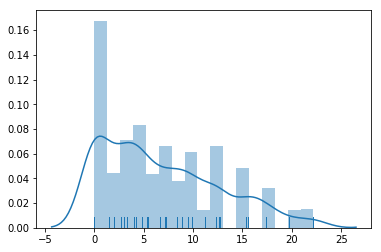

In [9]:
#code to automate visualizing the distribution 
#for each feature using a histogram with KDE overlay and rug to show where each data point is represented.    
feature_cols =[]
def vis_dist(feature_cols):
    X=noise.loc[:, [feature_cols]]
    g= sns.distplot(X, rug=True)
    
vis_dist('angle')

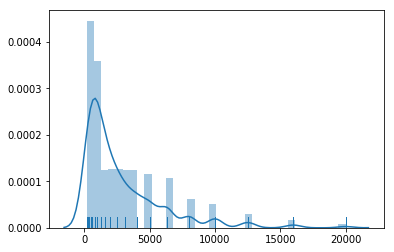

In [10]:
vis_dist('frequency')

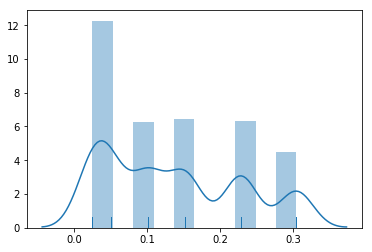

In [11]:
vis_dist('chord_length')

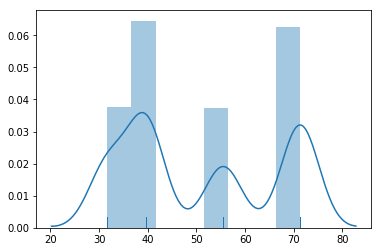

In [12]:
vis_dist('free_stream_velocity')

In [13]:
noise.columns

Index(['frequency', 'angle', 'chord_length', 'free_stream_velocity',
       'displacement_thickness', 'self_noise'],
      dtype='object')

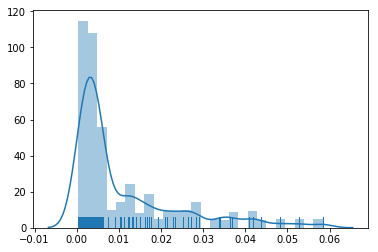

In [14]:
vis_dist('displacement_thickness')

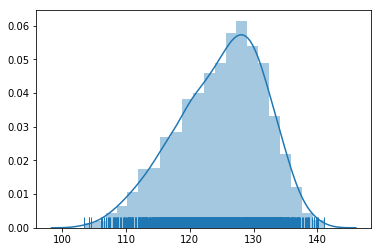

In [15]:
vis_dist('self_noise')

In [16]:
#except for free_stream_velocity and self_noise, we are getting really high numbers where the x axis is closer to zero, and the numbers lower seemingly exponentially as we move right of zero.

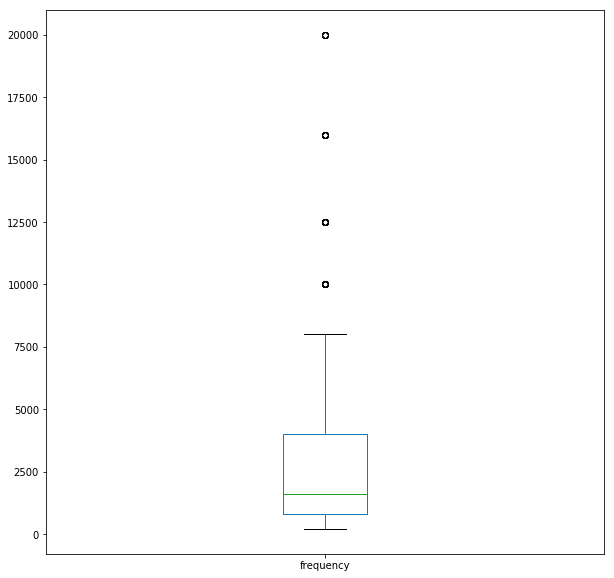

In [17]:
ax = noise.loc[:, 'frequency'].plot(kind='box', figsize=(10,10))

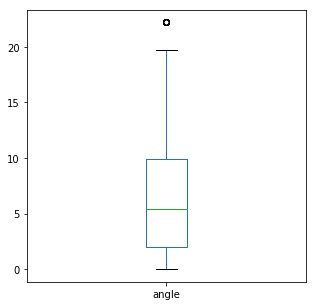

In [18]:
ax = noise.loc[:, 'angle'].plot(kind='box', figsize=(5,5))

The mean in 'angle' is at least mostly centered inside of the inner quartile range. We have an outlier affecting the skew.

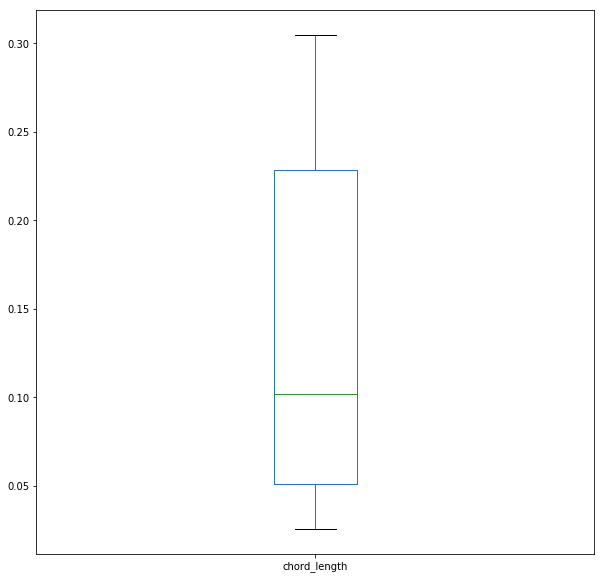

In [19]:
ax = noise.loc[:, 'chord_length'].plot(kind='box', figsize=(10,10)) #not really any outliers with chord length, but the mean is closer to the 25% percentile

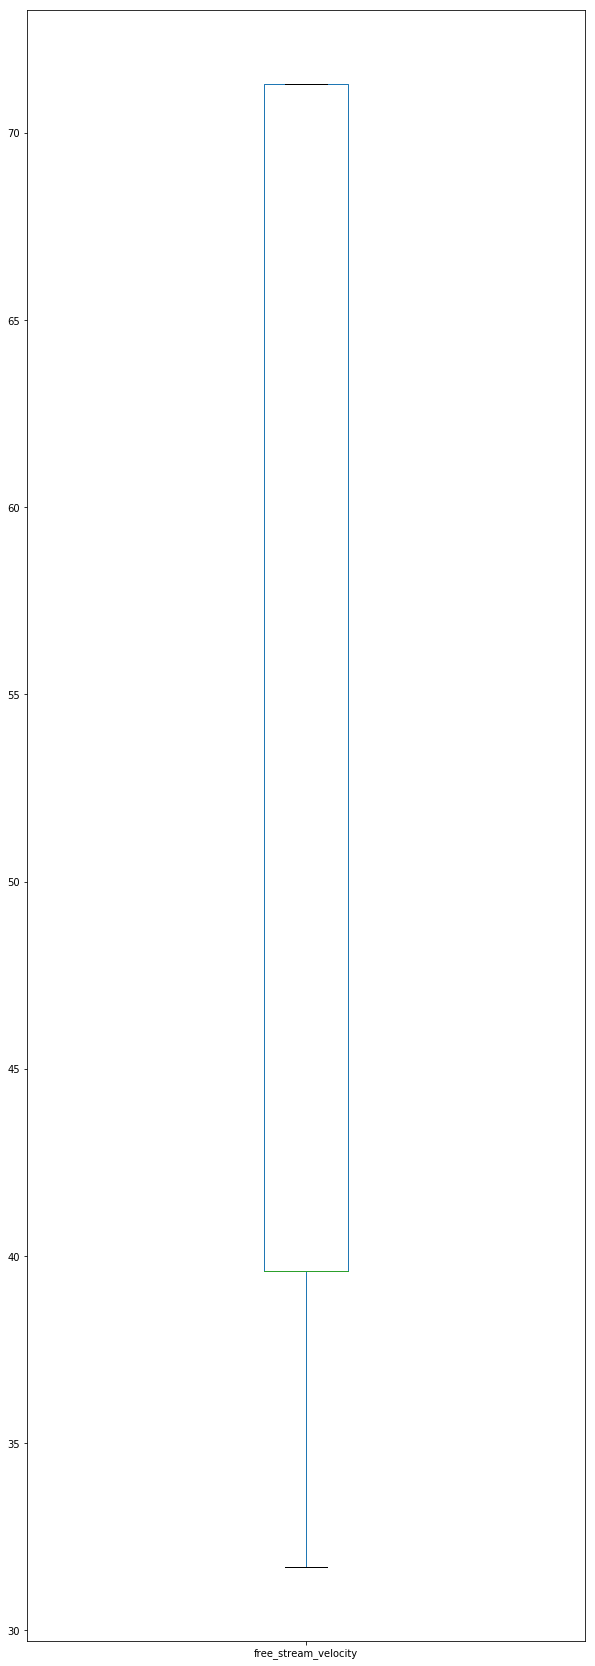

In [20]:
ax = noise.loc[:, 'free_stream_velocity'].plot(kind='box', figsize=(10,30))

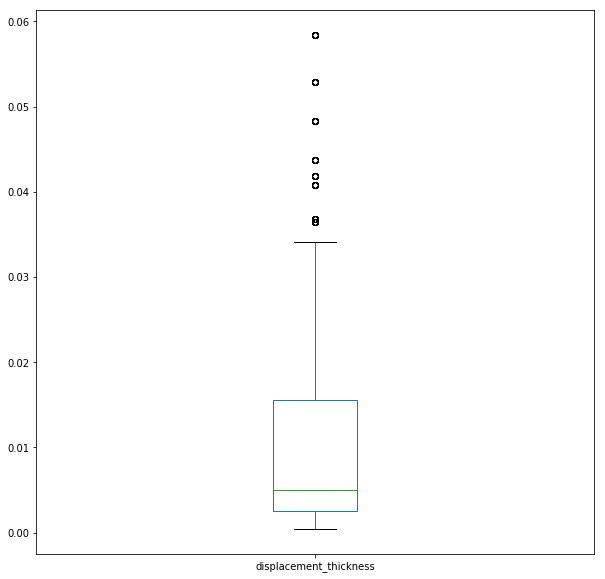

In [21]:
ax = noise.loc[:, 'displacement_thickness'].plot(kind='box', figsize=(10,10))# quite a few outliers on the high end, mean is much closer to 25th% percentile than 75th.

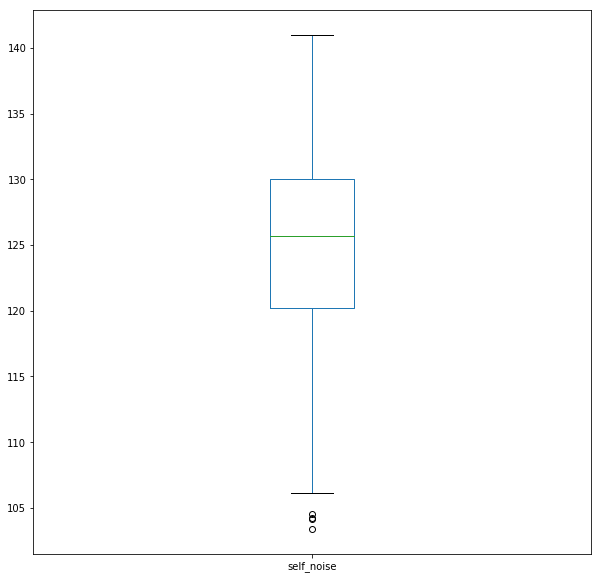

In [22]:
ax = noise.loc[:, 'self_noise'].plot(kind='box', figsize=(10,10)) #a few outliers on the lower end, closest to a normal distribution

- Which variables are approximately normally distributed?

A:  The only variable that is normally distributed is the target variable.  

- Which variables show strong skew?

A:  Angle, frequency and displacement thickness are all right skewed.

- Make a scatterplot of each feature variable with the target variable "self_noise".

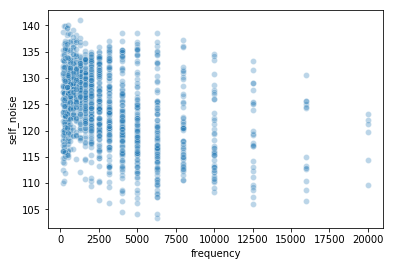

In [23]:
g = sns.scatterplot(x=noise.loc[:,'frequency'], y=noise.loc[:,'self_noise'], alpha =.3 )

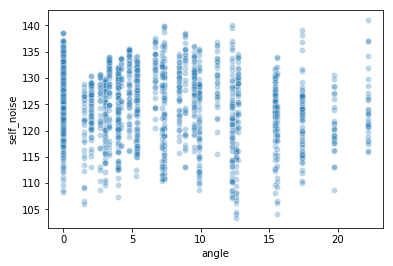

In [24]:
g = sns.scatterplot(x=noise.loc[:,'angle'], y=noise.loc[:,'self_noise'], alpha =.3 )


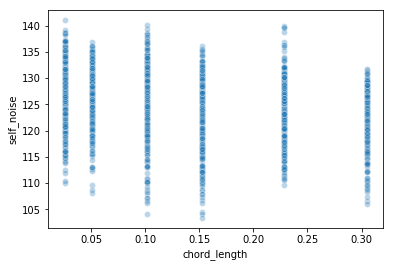

In [25]:
g = sns.scatterplot(x=noise.loc[:,'chord_length'], y=noise.loc[:,'self_noise'], alpha =.3 )

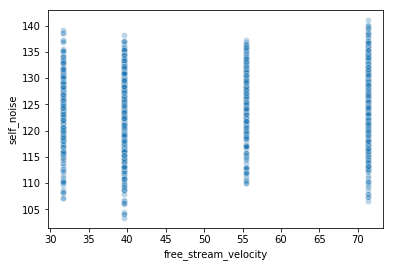

In [26]:
g = sns.scatterplot(x=noise.loc[:,'free_stream_velocity'], y=noise.loc[:,'self_noise'], alpha =.3 )

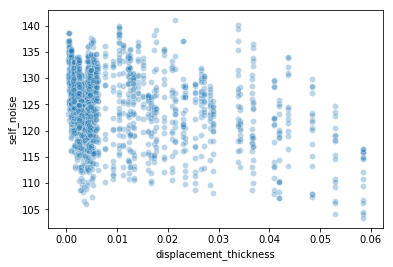

In [27]:
g = sns.scatterplot(x=noise.loc[:,'displacement_thickness'], y=noise.loc[:,'self_noise'], alpha =.3 )

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

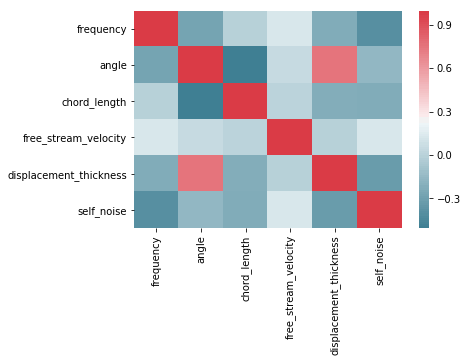

In [28]:
ax = sns.heatmap(noise.corr(),
                cmap=sns.diverging_palette(220, 10, n=101)
    )

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

A: There seems to be a negative correlation between displacement_thickness and self_noise, which is the type of relationship we may be looking for in this instance. There seems to be a positive correlation bewteen displacment_thickness and angle. I will want to see if there is an interaction between these two variables that increases prediction accuracy.

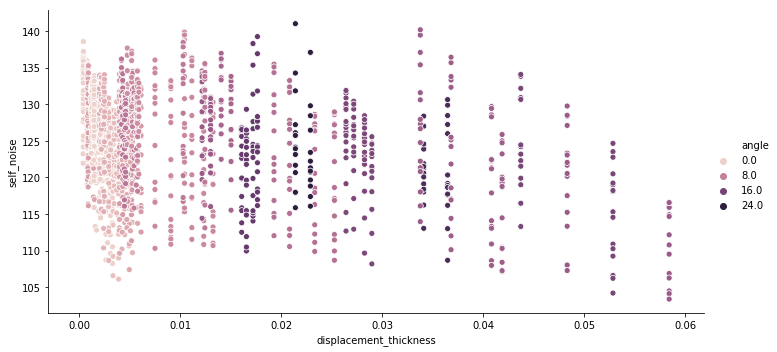

In [29]:
g=sns.relplot(x="displacement_thickness", y="self_noise", hue='angle', aspect=2,data=noise)

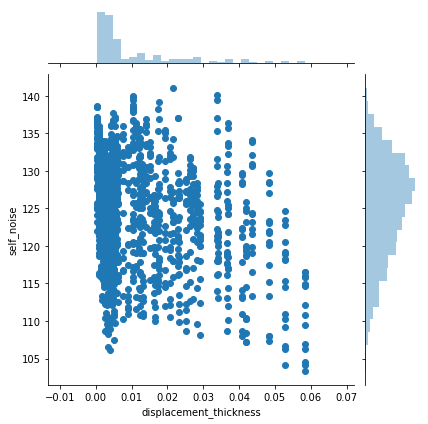

In [30]:

sns.jointplot(x="displacement_thickness", y="self_noise", data=noise);


- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [31]:
X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, 'self_noise']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=3)

In [33]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [34]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(10)

,Actual,Predicted
615,132.658,126.002985
1151,119.806,128.554839
822,128.435,129.140224
1333,131.362,129.137376
359,112.699,116.974507
290,130.307,124.822017
263,128.762,127.211345
1042,131.346,123.032389
1154,125.816,127.914326
603,130.893,128.312759


In [35]:
noise.loc[:,'self_noise'].mean()

124.83594278110434

In [36]:
print('Training Set R^2:',lr.score(X_train, y_train))
print('Test Set R^2:',lr.score(X_test, y_test))

Training Set R^2: 0.5194487490484332
Test Set R^2: 0.4955103571923559


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

A: The model is not getting good scores either way. Because the model is not even fitting the training data well, I would say it is underfitting. It has high bias. It can't seem to find the right line.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

A: Almost the same, so there is not a lot of variance, but the score is not good. We can build more flexibility into this model.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

A:The problem is more with bias, even on the training set there is only 51% accuracy. This model is not capturing the relationships between the data well. It needs to be more flexible.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [37]:
from sklearn.ensemble import RandomForestRegressor

target_col = 'self_noise'
X = noise.drop(target_col, axis='columns')
y = noise.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)
rfr = RandomForestRegressor(n_estimators = 100)

rfr.fit(X_train, y_train)
print('Train Set R^2:', rfr.score(X_train, y_train))
print('Test Set R^2:', rfr.score(X_test, y_test))

Train Set R^2: 0.9901390877868389
Test Set R^2: 0.9137224448531568


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

A: This model is performing better over all. There is a bigger spread between the training and test set scores, so it may be overfitting a little on the training set. We might need to reduce the max_depth.

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [38]:
rfr = RandomForestRegressor(n_estimators = 100, max_depth=16)#i tried changing the max_depth by hand and rerunning the cell
#by hand, the best scores seems to fall between 16 and 20, it varies a little each time.

rfr.fit(X_train, y_train)
print('Train Set R^2:', rfr.score(X_train, y_train))
print('Test Set R^2:', rfr.score(X_test, y_test))

Train Set R^2: 0.9894971518469889
Test Set R^2: 0.9114596729619276


In [39]:
y_pred = lr.predict(X_test)#now I will automate the process to find the best max_depth

max_depth_range = range(1, 30)

from sklearn.metrics.scorer import make_scorer

def neg_rmse(y_true, y_pred):
    squared_errors = (y_true-y_pred)**2
    mse = squared_errors.mean()
    rmse = np.sqrt(mse)
    return -rmse
neg_rmse_scorer = make_scorer(neg_rmse)

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0, 0.5, 'RMSE, lower is better')

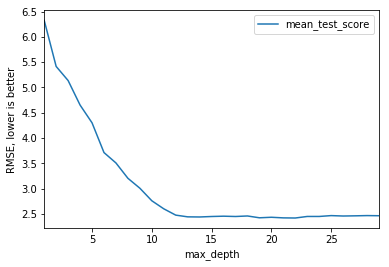

In [40]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, KFold
kf=KFold(10, shuffle=True)

grid =GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={'max_depth' : max_depth_range},
    cv=kf,
    return_train_score = True,
    scoring = neg_rmse_scorer
)

grid.fit(X,y)
scores = -pd.DataFrame(grid.cv_results_).loc[:, ['mean_test_score']]
scores.index = max_depth_range
ax = scores.plot()
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE, lower is better')

In [41]:
#Using the function we built in class gives me the same results, the best max_depth is about 16.

In [42]:
rfr = RandomForestRegressor(n_estimators = 100, max_depth=16)#i tried changing the max_depth by hand and rerunning the cell
#by hand, the best scores seems to fall between 16 and 20, it varies a little each time.

rfr.fit(X_train, y_train)
print('Train Set R^2:', rfr.score(X_train, y_train))
print('Test Set R^2:', rfr.score(X_test, y_test))

Train Set R^2: 0.9895398715624435
Test Set R^2: 0.911629743256314


- **BONUS:** Keep going! Find ways to make your model better.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)


In [44]:
rfr = RandomForestRegressor(n_estimators = 450, max_depth=16)#using the max depth from above, increasing the number of estimators, only gives a tiny boost

rfr.fit(X_train, y_train)
print('Train Set R^2:', rfr.score(X_train, y_train))
print('Test Set R^2:', rfr.score(X_test, y_test))

Train Set R^2: 0.9899723868237216
Test Set R^2: 0.9152045033312729


In [45]:
kf = KFold(n_splits=5, shuffle=True)#using Kfold cross validation instead of a simple train_test_split, gives us two more percentage points
#takes more time to run

rfr_grid = GridSearchCV(estimator=rfr, param_grid={}, cv=kf, return_train_score=True)
rfr_grid.fit(X, y)
results = rfr_grid.cv_results_
print('train_score', results['mean_train_score'][0])
print('test_score', results['mean_test_score'][0])

train_score 0.9911567339994987
test_score 0.9346154031185702


## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This data set is financial information. Presumably the kinds of things that you would need to know about a person to determine how risky it might be to loan them money or to determine their credit score, maybe. The data is taken from credit card applications. The information about the set does not tell us exactly what each column means, but the column that we are trying to predict is column sixteen. The data vary in type, some is considered continuous, some of the numeric data has a specific range, some is grouped within atribute by range. I am guessing the +,- for column sixteen represents approved or not approved application, though it could be people who made all their payments vs people who defaulted.  The categorical data has been coded, some of it with letters, so that will need dealt with.

In [46]:
# Load the dataset 
credit = pd.read_csv(
    'data/crx.data',
    names=('col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8',
           'col_9','col_10','col_11','col_12','col_13','col_14','col_15',
           'col_16')#I changed the columns names because I was not able to use dot notation while having integers for column names.
)

- Find out how many rows and columns are in `credit`.

In [47]:
credit.shape

(690, 16)

- Find out what data types are present.

In [48]:
credit.dtypes

col_1      object
col_2      object
col_3     float64
col_4      object
col_5      object
col_6      object
col_7      object
col_8     float64
col_9      object
col_10     object
col_11      int64
col_12     object
col_13     object
col_14     object
col_15      int64
col_16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [49]:
credit = credit.replace({'?': np.nan}).dropna()
#i tried several other commands, 
#but they all got confused because even inside the apostrophes a question mark must mean something.
#Making it a dictinary key seems to have bypassed that issue.


In [50]:
credit.loc[:,'col_14'] = pd.to_numeric(credit.col_14)
credit.loc[:,'col_2'] = pd.to_numeric(credit.col_2)
#I tried int() and float() to convert these,
#but it kept telling me you can't do that to a Series.

In [51]:
credit.shape #I've lost 37 rows

(653, 16)

- Find out how many null values there are in each columns.

In [52]:
credit.columns.isna().sum()#i already dropped them. col_2 and col_14 had at least the ?s I had converted to nan., 
#one had 12 rows and one had 13 rows. Total rows that contained null values after converting questions marks to nan was 37.

0

- Check basic summary information for each column, including categorical columns.

In [53]:
credit.describe(include='all')#for the non numeric columns passing'include='all'' gives you the rows "unique", "top", "freq".

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16
count,653,653.000000,653.000000,653,653,653,653,653.000000,653,653,653.000000,653,653,653.000000,653.000000,653
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,450,NaN,NaN,499,499,133,381,NaN,349,366,NaN,351,598,NaN,NaN,357
mean,NaN,31.503813,4.829533,NaN,NaN,NaN,NaN,2.244296,NaN,NaN,2.502297,NaN,NaN,180.359877,1013.761103,NaN
std,NaN,11.838267,5.027077,NaN,NaN,NaN,NaN,3.371120,NaN,NaN,4.968497,NaN,NaN,168.296811,5253.278504,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.580000,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,73.000000,0.000000,NaN
50%,NaN,28.420000,2.835000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.250000,7.500000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,272.000000,400.000000,NaN


In [54]:
credit.col_1.value_counts() #more than twice as many b than a 

b    450
a    203
Name: col_1, dtype: int64

In [55]:
credit.col_4.value_counts()

u    499
y    152
l      2
Name: col_4, dtype: int64

In [56]:
credit.col_5.value_counts() #the counts are the same as col_4, but the data in the columns is seemingly different

g     499
p     152
gg      2
Name: col_5, dtype: int64

In [57]:
credit.col_6.value_counts()

c     133
q      75
w      63
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: col_6, dtype: int64

In [58]:
credit.col_7.value_counts()

v     381
h     137
ff     54
bb     53
j       8
z       8
dd      6
n       4
o       2
Name: col_7, dtype: int64

In [59]:
credit.col_9.value_counts()

t    349
f    304
Name: col_9, dtype: int64

In [60]:
credit.col_10.value_counts()

f    366
t    287
Name: col_10, dtype: int64

In [61]:
credit.col_12.value_counts()

f    351
t    302
Name: col_12, dtype: int64

In [62]:
credit.col_13.value_counts()

g    598
s     53
p      2
Name: col_13, dtype: int64

- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

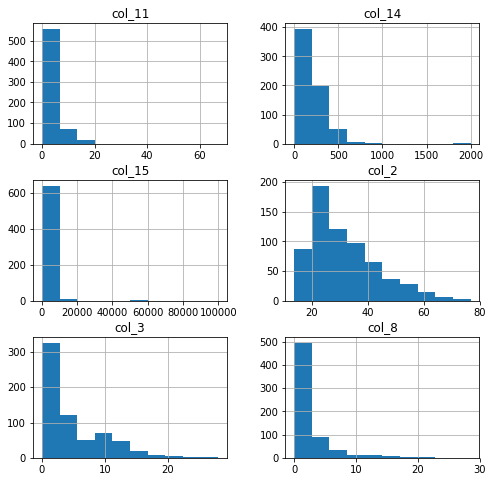

In [63]:
axes = credit.hist(figsize=(8,8))

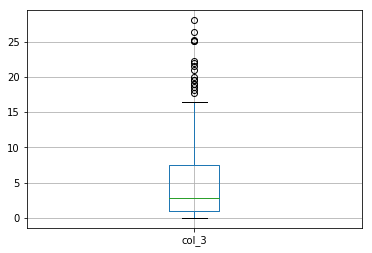

In [64]:
credit.loc[:,['col_3']].boxplot(); #a lot of outliers here

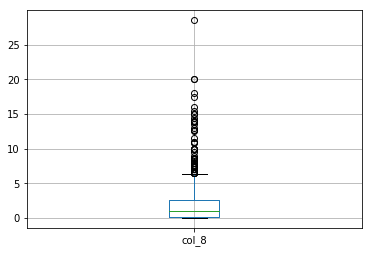

In [65]:
credit.loc[:,['col_8']].boxplot();# mean is closer to center of the inner quartile range, but there are a lot of outliers

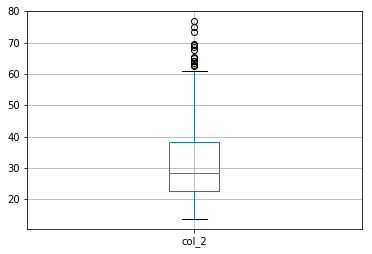

In [66]:
credit.loc[:,['col_2']].boxplot(); #again, mean is close to center of inner quatile range, but lots of outliers at the top

In [67]:
credit = credit.replace(to_replace=['+','-'], value=[1,0]) #i don't want to dummycode col_16, so I'm changing it to boolean since it's all yes no anyway

- Which variables are approximately normally distributed?

A: None have a totally normal distribution. Column 2 is the closest.

- Which variables show strong skew?

A:They all seem to have a right skew, but columns 8, 15 and 11 are the worst.

- Make a scatterplot of each feature variable with the target variable (`16`).

In [68]:
feature = ''
def scatter_plots(feature):
    g = sns.scatterplot(x=credit.loc[:,feature], y=credit.loc[:,'col_16'], alpha =.3 )   

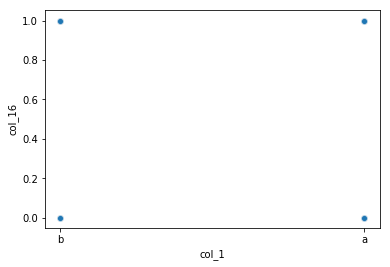

In [69]:
scatter_plots('col_1')

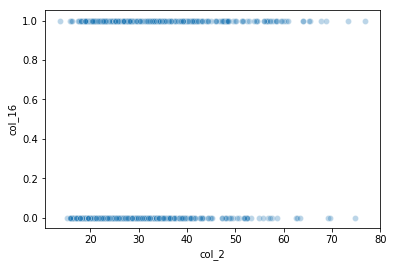

In [70]:
scatter_plots('col_2')

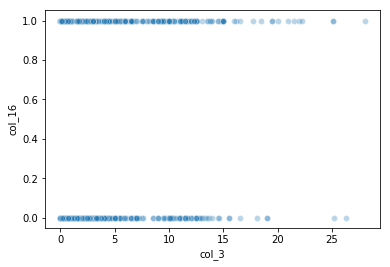

In [71]:
scatter_plots('col_3')

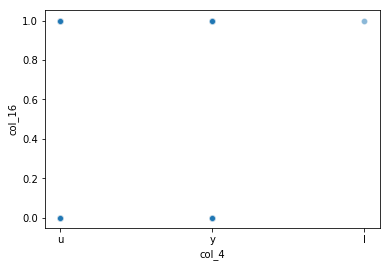

In [72]:
scatter_plots('col_4')

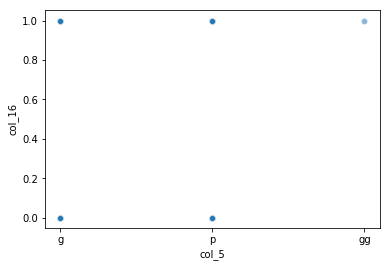

In [73]:
scatter_plots('col_5')

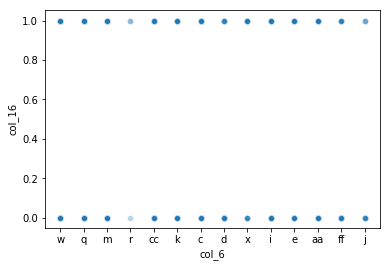

In [74]:
scatter_plots('col_6')

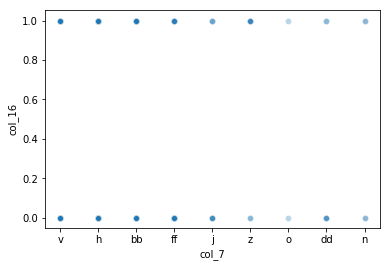

In [75]:
scatter_plots('col_7')

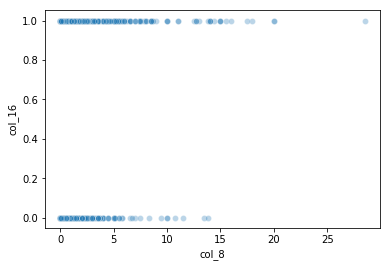

In [76]:
scatter_plots('col_8')

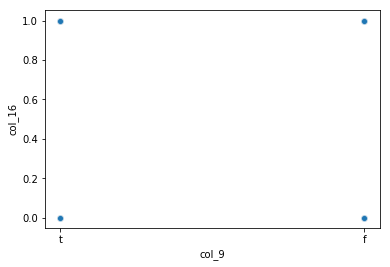

In [77]:
scatter_plots('col_9')

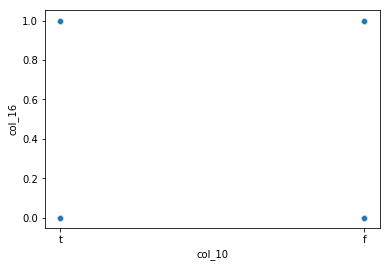

In [78]:
scatter_plots('col_10')

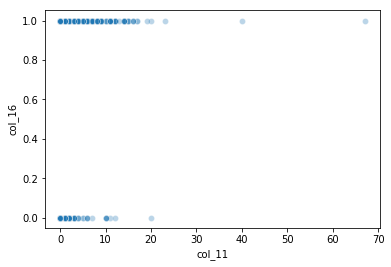

In [79]:
scatter_plots('col_11')

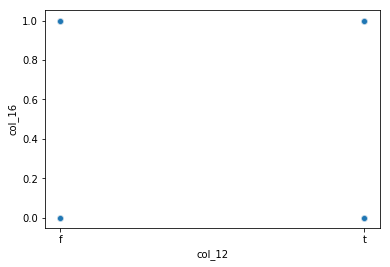

In [80]:
scatter_plots('col_12')

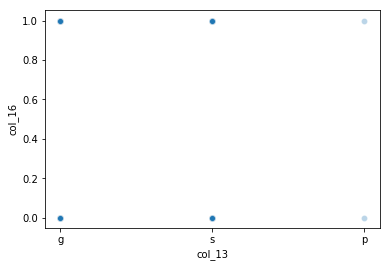

In [81]:
scatter_plots('col_13')

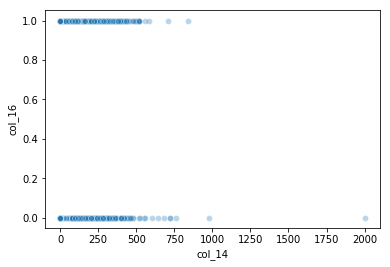

In [82]:
scatter_plots('col_14')

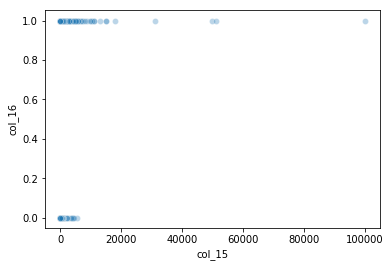

In [83]:
scatter_plots('col_15')

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

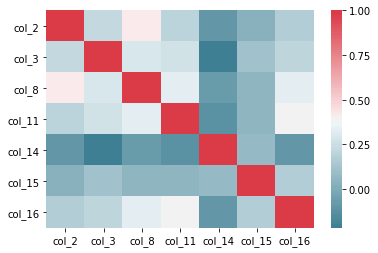

In [84]:
ax = sns.heatmap(credit.corr(),
                cmap=sns.diverging_palette(220, 10, n=101)
    )

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

A:  I'm not getting a lot of correlation with the target variable with only the numeric columns. I will need to convert the non-numeric columns. A lot of the choices are basically boolean. I will need to use classification instead of regression.

In [85]:
# maybe try a model with col_8, col_11, col_15 only

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?


In [86]:
credit.col_16.value_counts() #It would only be correct about 55% of the time.

0    357
1    296
Name: col_16, dtype: int64

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [87]:
credit = pd.get_dummies(credit, drop_first=True) 
credit.columns #I tried this without drop_first=True the first time through and got terrible results, presumably from two much redundancy

Index(['col_2', 'col_3', 'col_8', 'col_11', 'col_14', 'col_15', 'col_16',
       'col_1_b', 'col_4_u', 'col_4_y', 'col_5_gg', 'col_5_p', 'col_6_c',
       'col_6_cc', 'col_6_d', 'col_6_e', 'col_6_ff', 'col_6_i', 'col_6_j',
       'col_6_k', 'col_6_m', 'col_6_q', 'col_6_r', 'col_6_w', 'col_6_x',
       'col_7_dd', 'col_7_ff', 'col_7_h', 'col_7_j', 'col_7_n', 'col_7_o',
       'col_7_v', 'col_7_z', 'col_9_t', 'col_10_t', 'col_12_t', 'col_13_p',
       'col_13_s'],
      dtype='object')

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [89]:
target_col = 'col_16'

X = credit.drop([target_col], axis='columns')
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

In [90]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred.sample(5)

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Actual,Predicted
355,0,0
101,0,0
303,0,0
566,1,1
484,0,0


In [91]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8862144420131292
0.8673469387755102


In [92]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1326530612244898
Mean Squared Error: 0.1326530612244898
Root Mean Squared Error: 0.3642156795423418


In [93]:
pred_series = pd.Series(y_pred)
pred_series.value_counts()#51% of the time the model is predicting + and 49% of the time it is predicting -

1    100
0     96
dtype: int64

In [94]:
true_series = pd.Series(y_test)
true_series.value_counts() #45% of the time, the answer is +

0    106
1     90
Name: col_16, dtype: int64

In [95]:
metrics.confusion_matrix(y_test, y_pred)
#88 times when the true value was -, the model got it right. 12 times it predicted + instead.
#82 times when the true value was +, the model got it right. 8 times it predicted - instead. 

array([[88, 18],
       [ 8, 82]], dtype=int64)

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

A:  If we just guessed yes every time or no every time, we'd be wrong about half the time. So the model is definitely performing better than a null model. It's accuracy is about 87% on the test set. There is still some bias, it's not fitting enough on the training set, even at 88%.



- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

A:  There is not a big difference between the two, so not much variance at this point. This model has room to be made more flexible.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

A:  Right now bias is the bigger problem. I would like to see a higher score overall. The variance isn't what is hurting this model, but the maybe underfitting is. A Random Forest might not have the same issue.

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rfc =RandomForestClassifier(n_estimators=150, oob_score=True, random_state=21)

target_col = 'col_16'

X = credit.drop([target_col], axis='columns')
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8877551020408163


In [98]:
y_pred =rfc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[92, 14],
       [ 8, 82]], dtype=int64)

In [99]:
pred_series = pd.Series(y_pred)
pred_series.value_counts()

0    100
1     96
dtype: int64

In [100]:
true_series = pd.Series(y_test)
true_series.value_counts()

0    106
1     90
Name: col_16, dtype: int64

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

A:  The Random Forest Classifier model has a lot more variance than the logistic regression model. The score on this training set is almost 12% better than the test set. It is overfitting the training data for sure, since it's got a score of 100% and the differences in the test set are throwing it off by alot. This model is giving the same performance as the logistic regression model. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [101]:
target_col = 'col_16'

X1 = credit.drop([target_col], axis='columns')
y = credit.loc[:, target_col]

In [102]:
from sklearn.preprocessing import PolynomialFeatures #I was interested to see what would happen with polynomial tranformations on data where a lot of it is 1,0. 
pf = PolynomialFeatures(degree=3, include_bias=False)#It gives me a memory error if I use any number but three
pf.fit(X1)
X1 = pf.transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X1, y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.6666666666666666
0.6219512195121951


In [104]:
#this did the opposite of what we need and takes a long time to run

In [105]:
rfc = RandomForestClassifier(n_estimators=250, max_depth=10, random_state=21)#since the model was overfitting, I tried changing max_depth, but it really didn't help much

target_col = 'col_16'

X = credit.drop([target_col], axis='columns')
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
rfc.fit(X_train,y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test)) 
#for n_estimators=150: score for max_depth=3 train-87%/test-88%, max_depth=4 train-88%/test88%(no improvment), max_depth=5 train-90%, test-88%
#for n_estimators=250: score for max_depth=3 train-89%/test-83%, max_depth=4 train 90%/test84%, max_depth=5 train-91%/test-85%, max_depth=6 train-92%/test-86%
#at max_depth 10 with 250 estimators, it's not overfitting quite as much, but the score on the test set is not any better than the original model

0.986870897155361
0.8877551020408163


In [106]:
y_pred =rfc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[91, 15],
       [ 7, 83]], dtype=int64)

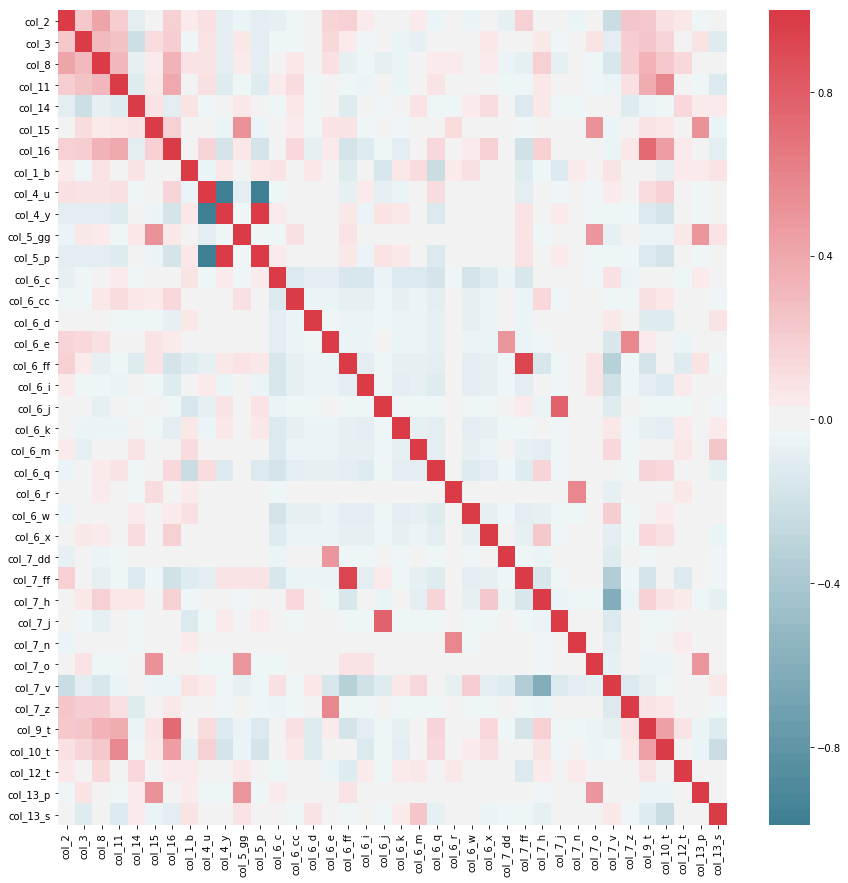

In [107]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(credit.corr(),
            cmap=sns.diverging_palette(220, 10, n=101),
            ax=ax
                 
);

In [108]:
X = credit.drop(target_col, axis='columns') #changing the arguments passed to logisitic regression doesn't seem to help either.
y = credit.loc[:, target_col]
lr = LogisticRegression(random_state=21, max_iter=200,solver='newton-cg', multi_class='multinomial')
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8957055214723927
0.8597560975609756


In [109]:
#i want to try changing how the columns are encoded, so I'm reloadng the original dataframe under a new name.


In [110]:
credit2 = pd.read_csv(
    'data/crx.data',
    names=('col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8',
           'col_9','col_10','col_11','col_12','col_13','col_14','col_15',
           'col_16')
)

In [111]:
credit2 = credit2.replace({'?': np.nan}).dropna()

In [112]:
credit2.loc[:,'col_14'] = pd.to_numeric(credit.col_14)
credit2.loc[:,'col_2'] = pd.to_numeric(credit.col_2)

In [113]:
credit2 = credit2.replace(to_replace=['+','-'], value=[1,0]) 

In [114]:
credit2.describe(include='all')

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16
count,653,653.000000,653.000000,653,653,653,653,653.000000,653,653,653.000000,653,653,653.000000,653.000000,653.000000
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,NaN
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,NaN
freq,450,NaN,NaN,499,499,133,381,NaN,349,366,NaN,351,598,NaN,NaN,NaN
mean,NaN,31.503813,4.829533,NaN,NaN,NaN,NaN,2.244296,NaN,NaN,2.502297,NaN,NaN,180.359877,1013.761103,0.453292
std,NaN,11.838267,5.027077,NaN,NaN,NaN,NaN,3.371120,NaN,NaN,4.968497,NaN,NaN,168.296811,5253.278504,0.498195
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,22.580000,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,73.000000,0.000000,0.000000
50%,NaN,28.420000,2.835000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,0.000000
75%,NaN,38.250000,7.500000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,272.000000,400.000000,1.000000


In [115]:
#'col_4','col_5','col_6', 'col_7','col_13' will be encoded using LabelEncoder

In [116]:
# Label Encode instead of dummy variables
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


le.fit(credit2['col_4'])#I've never used this before,but I found it only takes one column at a time
credit2.loc[:, 'col_4'] = le.transform(credit2['col_4'])
credit2.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16
0,b,30.83,0.000,1,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,1,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,1,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,1,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,1,g,w,v,1.71,t,f,0,f,s,120,0,1


In [117]:
col_to_encode =['col_5','col_6', 'col_7','col_13']

for col in col_to_encode:#I wrote this to take care of all the columns that needed encoding with having to copy and paste/rewrite the same code over and over   
    le.fit(credit2[col])
    credit2.loc[:, col] =le.transform(credit2[col])
        


In [118]:
credit2 = pd.get_dummies(credit2, columns=['col_1', 'col_9', 'col_10', 'col_12'], drop_first=True) 

In [119]:
target_col = 'col_16'

X = credit2.drop([target_col], axis='columns')
y = credit2.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)

In [120]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

actual_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_pred.sample(5)

,Actual,Predicted
285,0,0
672,0,0
35,1,1
634,0,0
84,0,1


In [121]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test)) #it has made zero difference for our Logistic Regression Model

0.8862144420131292
0.8673469387755102


In [122]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1326530612244898
Mean Squared Error: 0.1326530612244898
Root Mean Squared Error: 0.3642156795423418


In [123]:
pred_series = pd.Series(y_pred)
true_series = pd.Series(y_test)

pred_series.value_counts(),true_series.value_counts()

(1    104
 0     92
 dtype: int64, 0    106
 1     90
 Name: col_16, dtype: int64)

In [124]:
metrics.confusion_matrix(y_test, y_pred)#We've only switched up a little between each category when compared to the previous matrix   

array([[86, 20],
       [ 6, 84]], dtype=int64)

In [125]:
X = credit2.drop(target_col, axis='columns') #changing the arguments passed to logisitc regression doesn't seem to help here either.
y = credit2.loc[:, target_col]
lr = LogisticRegression(random_state=21, max_iter=100,solver='newton-cg', multi_class='multinomial')
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8895705521472392
0.8536585365853658


In [126]:
col_iter = credit2.drop(target_col, axis='columns')#I want to know which columns are giving the best predictions.

for col in col_iter:
    X = credit2.loc[:, [col]]
    y = credit2.loc[:, target_col]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
    lr.fit(X_train, y_train)
    print(col)
    print(lr.score(X_train, y_train))
    print(lr.score(X_test, y_test))
    

col_2
0.5991820040899796
0.5975609756097561
col_3
0.5807770961145194
0.6463414634146342
col_4
0.5603271983640081
0.5182926829268293
col_5
0.556237218813906
0.5182926829268293
col_6
0.5828220858895705
0.6036585365853658
col_7
0.556237218813906
0.5182926829268293
col_8
0.6748466257668712
0.5792682926829268
col_11
0.7402862985685071
0.75
col_13
0.556237218813906
0.5182926829268293
col_14
0.556237218813906
0.5182926829268293
col_15
0.6748466257668712
0.6402439024390244
col_1_b
0.556237218813906
0.5182926829268293
col_9_t
0.8568507157464212
0.8841463414634146
col_10_t
0.7382413087934561
0.7012195121951219
col_12_t
0.556237218813906
0.5182926829268293


In [127]:
#it looks like most of the accuracy in prediction comes from the relationship with col_9_t; col_11 seems to have a meaningful relationship, as well as col_10_t.

In [128]:
rfc =RandomForestClassifier(n_estimators=300, max_depth=17,oob_score=True, random_state=21)

target_col = 'col_16'

X = credit2.drop([target_col], axis='columns')
y = credit2.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8826530612244898


In [129]:
y_pred =rfc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[91, 15],
       [ 8, 82]], dtype=int64)

In [130]:
rfc.oob_score_

0.8687089715536105

In [131]:
#this model is not performing better than the rfc on credit with this encoding either.

In [132]:
col_iter = credit2.drop(target_col, axis='columns')#I want to know which columns are giving the best predictions for Random Forest.

for col in col_iter:
    X = credit2.loc[:, [col]]
    y = credit2.loc[:, target_col]
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21)
    rfc.fit(X_train, y_train)
    print(col)
    print(rfc.score(X_train, y_train))
    print(rfc.score(X_test, y_test))

col_2
0.8466257668711656
0.5487804878048781
col_3
0.7443762781186094
0.5670731707317073
col_4
0.5603271983640081
0.5182926829268293
col_5
0.5603271983640081
0.5182926829268293
col_6
0.6646216768916156
0.6341463414634146
col_7
0.6114519427402862
0.6036585365853658
col_8
0.7566462167689162
0.6280487804878049
col_11
0.7423312883435583
0.725609756097561
col_13
0.558282208588957
0.5121951219512195
col_14
0.7586912065439673
0.6097560975609756
col_15
0.7750511247443763
0.676829268292683
col_1_b
0.556237218813906
0.5182926829268293
col_9_t
0.8568507157464212
0.8841463414634146
col_10_t
0.7382413087934561
0.7012195121951219
col_12_t
0.556237218813906
0.5182926829268293


In [133]:
#this model seems to way overfit on column 2, so I'm dropping the column
X = credit2.drop([target_col, 'col_2'], axis='columns')
y = credit2.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8877551020408163


In [134]:
#not much difference

In [135]:
y_pred =rfc.predict(X_test)
rfc_encode_drop_2_matrix = metrics.confusion_matrix(y_test, y_pred)
rfc_encode_drop_2_matrix

array([[93, 13],
       [ 9, 81]], dtype=int64)

In [136]:
rfc.oob_score_

0.87527352297593

In [138]:
#trying the original with all dummy encoding
X = credit.drop([target_col, 'col_2'], axis='columns')
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8928571428571429


In [139]:
#I finally broke the 88% barrier by dropping column 2 and using the original dummy encoding.

In [141]:
y_pred =rfc.predict(X_test)
rfc_dummies_drop_2_matrix = metrics.confusion_matrix(y_test, y_pred)
print(rfc_dummies_drop_2_matrix)
print(rfc_encode_drop_2_matrix)#the difference was one more true pos than before

[[93 13]
 [ 8 82]]
[[93 13]
 [ 9 81]]


In [142]:
rfc.oob_score_

0.8708971553610503

In [143]:
X = credit.drop([target_col, 'col_2', 'col_3'], axis='columns')
y = credit.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21)
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8928571428571429


In [144]:
rfc.oob_score_

0.8577680525164114

In [145]:
y_pred =rfc.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[93, 13],
       [ 8, 82]], dtype=int64)

- **BONUS:** Keep going! Find ways to make your model better.

  Below are the feature columns that had stood out to me before as possibly having the strongest correlation with the target variable, but it doesn't seem to improve the model to use only these features, even using KFold.

In [167]:
feature_cols =  ['col_9_t', 'col_10_t', 'col_8', 'col_11', 'col_15']    
X = credit.loc[:, feature_cols]
y = credit.loc[:, target_col]

In [168]:
kf = KFold(n_splits=35, shuffle=True)#using Kfold cross validation instead of a simple train_test_split


rfc_grid = GridSearchCV(estimator=rfc, param_grid={}, cv=kf, return_train_score=True)
rfc_grid.fit(X, y)
results = rfc_grid.cv_results_
print('train_score', results['mean_train_score'][0])
print('test_score', results['mean_test_score'][0])

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train_score 0.96063403746456
test_score 0.8407350689127105


In [169]:
X = credit.drop([target_col, 'col_2', 'col_3'], axis='columns')
y= credit.loc[:, target_col]

rfc_grid = GridSearchCV(estimator=rfc, param_grid={}, cv=kf, return_train_score=True)
rfc_grid.fit(X, y)
results = rfc_grid.cv_results_
print('train_score', results['mean_train_score'][0])
print('test_score', results['mean_test_score'][0])

C:\Users\lacey\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


train_score 1.0
test_score 0.886676875957121


Unfortunately, using KFold even while using the best max_depth and n_estimators from before isn't doing any better, but it's better to know that for sure than to not try.